Insira o Data set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Data_set/Rio_Guanabara_moluscos.xlsx')
x0 = df[['ano', 'GUA']].dropna().values
x1 = df[['ano', 'RJ']].dropna().values
df_x0 = pd.DataFrame(x0, columns=['ano', 'GUA'])
df_x1 = pd.DataFrame(x1, columns=['ano', 'RJ'])
df_x0 = df_x0.drop_duplicates(subset='GUA')
df_x1 = df_x1.drop_duplicates(subset='RJ')

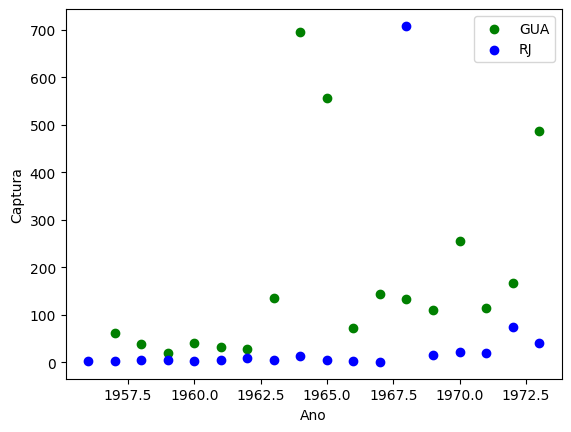

In [4]:
plt.scatter(x0[:, 0], x0[:, 1], c='g', label='GUA')
plt.scatter(x1[:, 0], x1[:, 1], c='b', label='RJ')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.legend()
plt.show()

In [5]:
def predizer_captura(ano):
    ano_normalized = (ano - x_mean) / x_std     
    ano_normalized = np.array(ano_normalized).reshape(-1, 1)     
    captura_normalized = model.predict(ano_normalized)     
    captura = captura_normalized * y_std + y_mean    
    return captura[0][0]

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


x = np.array(df_x0['ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x0['GUA'], dtype=np.float32).reshape(-1, 1)


x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std


model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
])

opt = tf.keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
history = model.fit(x_normalized, y_normalized, epochs=250, verbose=0)


In [35]:
ano = 1956
captura_predita = predizer_captura(ano)
print(f"A captura predita para o ano {ano} é: {captura_predita}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
A captura predita para o ano 1956 é: 47.619140625


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


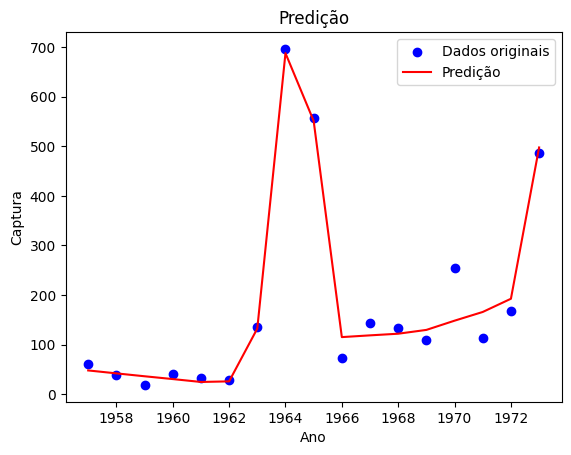

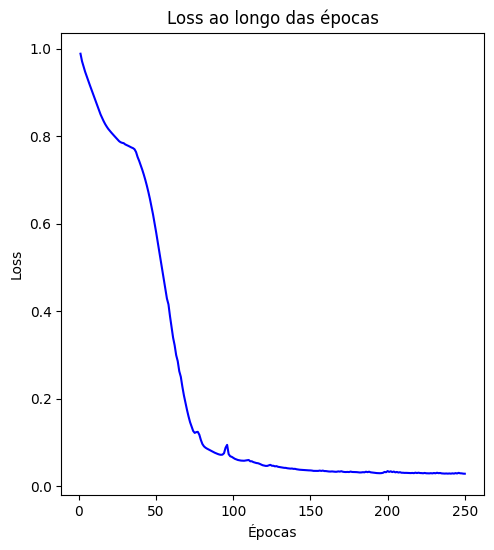

In [33]:

x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean
df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')


plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição')
plt.legend()
plt.show()


loss_values = history.history['loss']
accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()
